In [45]:
import numpy as np
import os

np.random.seed(42)

%pylab inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

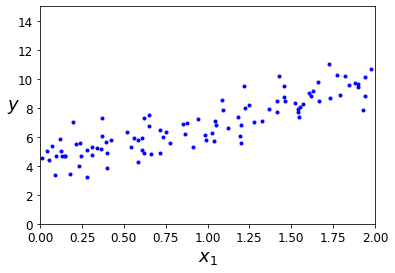

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # adding x0 (ones)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

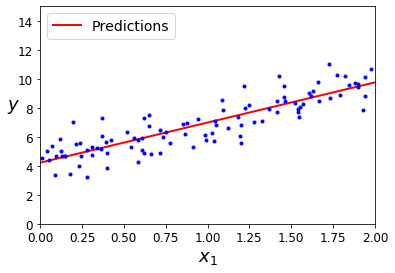

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None): #batch GD
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

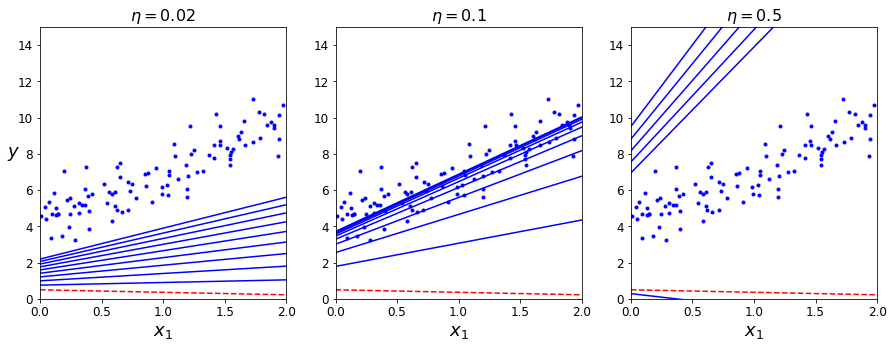

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [15]:
# so learning rate tuning is extremely important
'!!! DO NOT FORGET TOLERANCE !!!'

'!!! DO NOT FORGET TOLERANCE !!!'

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [17]:
#stochastic GD
'wanky code, rewrite later!'

'wanky code, rewrite later!'

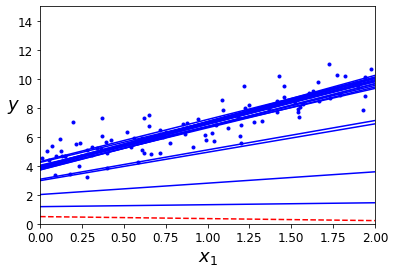

In [18]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)             

plt.plot(X, y, 'b.')                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                               
plt.show()                                          

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=50, tol=-np.inf, penalty=None, eta0=0.1, random_state=42)
sgd.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd.intercept_, sgd.coef_

(array([4.16782089]), array([2.72603052]))

In [22]:
#mini-batch

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [25]:
#visualisation of GDs for Linear Regression

In [26]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

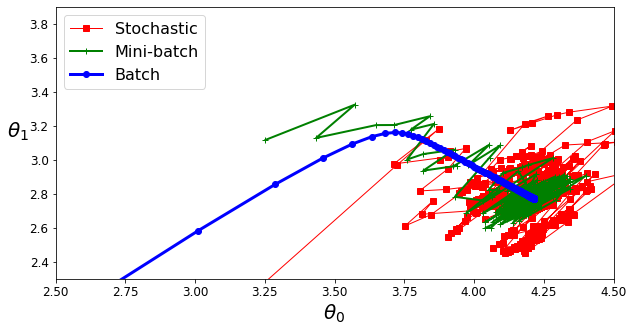

In [27]:
plt.figure(figsize=(10,5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [28]:
# Comparsion Animation (from SO)

In [29]:
from __future__ import print_function, division, unicode_literals
import numpy as np

%matplotlib nbagg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

m = 100
X = 2*np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
y = 4 + 3*X + np.random.rand(m, 1)

In [30]:
def batch_gradient_descent():
    n_iterations = 1000
    learning_rate = 0.05
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for i in range(n_iterations):
        gradients = 2*X_b.T.dot(X_b.dot(thetas) - y)/m
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

    return thetas_path

def stochastic_gradient_descent():
    n_epochs = 50
    t0, t1 = 5, 50
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2*xi.T.dot(xi.dot(thetas) - yi)
            eta = learning_schedule(epoch*m + i, t0, t1)
            thetas = thetas - eta*gradients
            thetas_path.append(thetas)

    return thetas_path

def mini_batch_gradient_descent():
    n_iterations = 50
    minibatch_size = 20
    t0, t1 = 200, 1000
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2*xi.T.dot(xi.dot(thetas) - yi)/minibatch_size
            eta = learning_schedule(t, t0, t1)
            thetas = thetas - eta*gradients
            thetas_path.append(thetas)

    return thetas_path

In [31]:
def compute_mse(theta):
    return np.sum((np.dot(X_b, theta) - y)**2)/m

In [32]:
def learning_schedule(t, t0, t1):
    return t0/(t+t1)

In [33]:
theta0, theta1 = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
r, c = theta0.shape
cost_map = np.array([[0 for _ in range(c)] for _ in range(r)])
for i in range(r):
    for j in range(c):
        theta = np.array([theta0[i,j], theta1[i,j]])
        cost_map[i,j] = compute_mse(theta)

In [34]:
exact_solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
bgd_thetas = np.array(batch_gradient_descent())
sgd_thetas = np.array(stochastic_gradient_descent())
mbgd_thetas = np.array(mini_batch_gradient_descent())

In [35]:
bgd_len = len(bgd_thetas)
sgd_len = len(sgd_thetas)
mbgd_len = len(mbgd_thetas)
n_iter = min(bgd_len, sgd_len, mbgd_len)

<IPython.core.display.Javascript object>


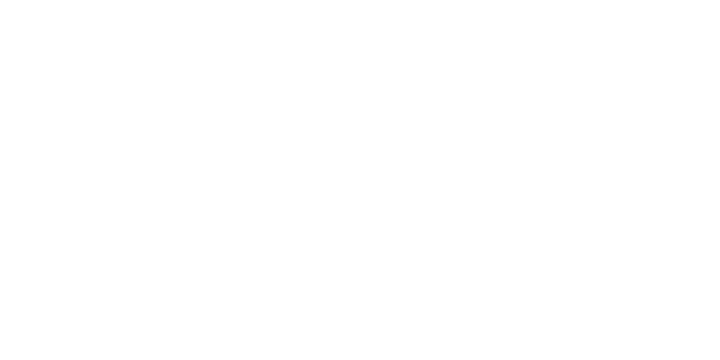

<IPython.core.display.Javascript object>


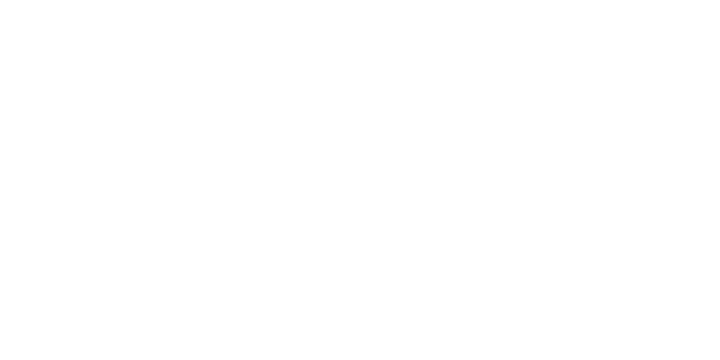

In [40]:
fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
cost_img = cost_ax.pcolor(theta0, theta1, cost_map)
fig.colorbar(cost_img)

In [41]:
def animate(i):
    data_ax.cla()
    cost_ax.cla()

    data_ax.plot(X, y, 'k.')

    cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
    cost_ax.pcolor(theta0, theta1, cost_map)

    data_ax.plot(X, X_b.dot(bgd_thetas[i,:]), 'r-')
    cost_ax.plot(bgd_thetas[:i,0], bgd_thetas[:i,1], 'r--')

    data_ax.plot(X, X_b.dot(sgd_thetas[i,:]), 'g-')
    cost_ax.plot(sgd_thetas[:i,0], sgd_thetas[:i,1], 'g--')

    data_ax.plot(X, X_b.dot(mbgd_thetas[i,:]), 'b-')
    cost_ax.plot(mbgd_thetas[:i,0], mbgd_thetas[:i,1], 'b--')

    data_ax.set_xlim([0, 2])
    data_ax.set_ylim([0, 15])
    cost_ax.set_xlim([0, 5])
    cost_ax.set_ylim([0, 5])

    data_ax.set_xlabel(r'$x_1$')
    data_ax.set_ylabel(r'$y$', rotation=0)
    cost_ax.set_xlabel(r'$\theta_0$')
    cost_ax.set_ylabel(r'$\theta_1$')

    data_ax.legend(('Data', 'BGD', 'SGD', 'MBGD'), loc="upper left")
    cost_ax.legend(('Normal Equation', 'BGD', 'SGD', 'MBGD'), loc="upper left")

In [50]:
animation = FuncAnimation(fig, animate, frames=n_iter)